This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 3s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 26ms/step - loss: 0.6241 - accuracy: 0.8091 - val_loss: 0.2488 - val_accuracy: 0.9263
Epoch 2/10
375/375 [==============================] - 7s 20ms/step - loss: 0.2448 - accuracy: 0.9233 - val_loss: 0.2914 - val_accuracy: 0.9084
Epoch 3/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1581 - accuracy: 0.9510 - val_loss: 0.1427 - val_accuracy: 0.9577
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.1101 - accuracy: 0.9654 - val_loss: 0.1488 - val_accuracy: 0.9567
Epoch 5/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0824 - accuracy: 0.9748 - val_loss: 0.1432 - val_accuracy: 0.9572
Epoch 6/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0614 - accuracy: 0.9805 - val_loss: 0.1183 - val_accuracy: 0.9662
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0451 - accuracy: 0.9853 - val_loss: 0.1349 - val_accuracy: 0.963

**Plotting a validation accuracy comparison**

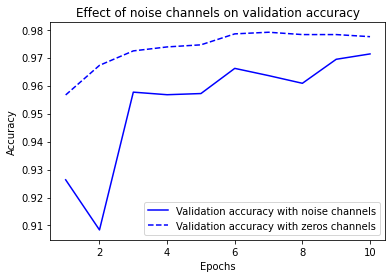

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [4]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 11ms/step - loss: 2.3172 - accuracy: 0.1037 - val_loss: 2.3060 - val_accuracy: 0.1053
Epoch 2/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2994 - accuracy: 0.1198 - val_loss: 2.3126 - val_accuracy: 0.1053
Epoch 3/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2887 - accuracy: 0.1294 - val_loss: 2.3222 - val_accuracy: 0.0988
Epoch 4/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2747 - accuracy: 0.1388 - val_loss: 2.3320 - val_accuracy: 0.1024
Epoch 5/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2563 - accuracy: 0.1568 - val_loss: 2.3451 - val_accuracy: 0.1028
Epoch 6/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2341 - accuracy: 0.1708 - val_loss: 2.3580 - val_accuracy: 0.1023
Epoch 7/100
375/375 [==============================] - 4s 10ms/step - loss: 2.2094 - accuracy: 0.1860 - val_loss: 2.3731 - val_accuracy:

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [5]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 545.1163 - accuracy: 0.3913 - val_loss: 2.5437 - val_accuracy: 0.3391
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 4.7461 - accuracy: 0.3060 - val_loss: 3.2996 - val_accuracy: 0.3371
Epoch 3/10
375/375 [==============================] - 4s 10ms/step - loss: 2.6572 - accuracy: 0.2984 - val_loss: 2.9653 - val_accuracy: 0.2945
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 2.8967 - accuracy: 0.3216 - val_loss: 2.6620 - val_accuracy: 0.3022
Epoch 5/10
375/375 [==============================] - 4s 10ms/step - loss: 2.7016 - accuracy: 0.2935 - val_loss: 2.5135 - val_accuracy: 0.3167
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 2.5141 - accuracy: 0.2975 - val_loss: 2.2114 - val_accuracy: 0.3487
Epoch 7/10
375/375 [==============================] - 4s 10ms/step - loss: 2.8817 - accuracy: 0.2901 - val_loss: 2.1357 - val_accuracy: 0.25

**The same model with a more appropriate learning rate**

In [6]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 5s 11ms/step - loss: 0.3572 - accuracy: 0.9140 - val_loss: 0.1543 - val_accuracy: 0.9599
Epoch 2/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1383 - accuracy: 0.9642 - val_loss: 0.2006 - val_accuracy: 0.9551
Epoch 3/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1117 - accuracy: 0.9731 - val_loss: 0.1797 - val_accuracy: 0.9673
Epoch 4/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1011 - accuracy: 0.9780 - val_loss: 0.1852 - val_accuracy: 0.9688
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0926 - accuracy: 0.9818 - val_loss: 0.2035 - val_accuracy: 0.9711
Epoch 6/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0836 - accuracy: 0.9844 - val_loss: 0.2285 - val_accuracy: 0.9684
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.0646 - accuracy: 0.9876 - val_loss: 0.2857 - val_accuracy: 0.9725

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [7]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 0.6665 - accuracy: 0.8343 - val_loss: 0.3622 - val_accuracy: 0.9047
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3523 - accuracy: 0.9035 - val_loss: 0.3095 - val_accuracy: 0.9143
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3164 - accuracy: 0.9113 - val_loss: 0.2903 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2997 - accuracy: 0.9167 - val_loss: 0.2824 - val_accuracy: 0.9213
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2900 - accuracy: 0.9196 - val_loss: 0.2741 - val_accuracy: 0.9247
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.9211 - val_loss: 0.2730 - val_accuracy: 0.9246
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2784 - accuracy: 0.9226 - val_loss: 0.2689 - val_accuracy: 0.9259
Epoch 

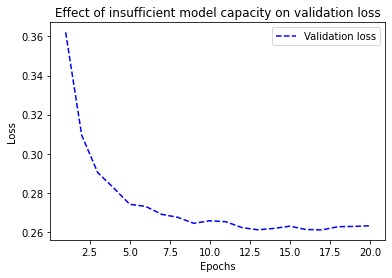

In [8]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [9]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3600 - accuracy: 0.8962 - val_loss: 0.1722 - val_accuracy: 0.9507
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1529 - accuracy: 0.9549 - val_loss: 0.1437 - val_accuracy: 0.9572
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.1083 - accuracy: 0.9678 - val_loss: 0.1098 - val_accuracy: 0.9672
Epoch 4/20
375/375 [==============================] - 2s 7ms/step - loss: 0.0834 - accuracy: 0.9751 - val_loss: 0.1067 - val_accuracy: 0.9680
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0664 - accuracy: 0.9805 - val_loss: 0.0971 - val_accuracy: 0.9702
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0851 - val_accuracy: 0.9749
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0950 - val_accuracy: 0.9735
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [10]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 51ms/step - loss: 0.5400 - accuracy: 0.7981 - val_loss: 0.4092 - val_accuracy: 0.8674
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3298 - accuracy: 0.8963 - val_loss: 0.3186 - val_accuracy: 0.8834
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2383 - accuracy: 0.9227 - val_loss: 0.3009 - val_accuracy: 0.8770
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1888 - accuracy: 0.9365 - val_loss: 0.2710 - val_accuracy: 0.8952
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1551 - accuracy: 0.9495 - val_loss: 0.2837 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1249 - accuracy: 0.9616 - val_loss: 0.2900 - val_accuracy: 0.8884
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1057 - accurac

**Version of the model with lower capacity**

In [11]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 62ms/step - loss: 0.6497 - accuracy: 0.5976 - val_loss: 0.6121 - val_accuracy: 0.6725
Epoch 2/20
30/30 [==============================] - 2s 62ms/step - loss: 0.5836 - accuracy: 0.7315 - val_loss: 0.5685 - val_accuracy: 0.7942
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.5374 - accuracy: 0.7984 - val_loss: 0.5322 - val_accuracy: 0.8174
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4998 - accuracy: 0.8418 - val_loss: 0.5048 - val_accuracy: 0.8214
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4676 - accuracy: 0.8691 - val_loss: 0.4820 - val_accuracy: 0.8530
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4401 - accuracy: 0.8932 - val_loss: 0.4667 - val_accuracy: 0.8388
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4148 - accuracy: 0.9083 - val_loss: 0.4490 - val_accuracy: 0.8587
Epoch 8/20
30

**Version of the model with higher capacity**

In [12]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 10s 316ms/step - loss: 0.5366 - accuracy: 0.7565 - val_loss: 0.3471 - val_accuracy: 0.8536
Epoch 2/20
30/30 [==============================] - 9s 315ms/step - loss: 0.2533 - accuracy: 0.8989 - val_loss: 0.2725 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 9s 314ms/step - loss: 0.1676 - accuracy: 0.9372 - val_loss: 0.2709 - val_accuracy: 0.8908
Epoch 4/20
30/30 [==============================] - 9s 317ms/step - loss: 0.1058 - accuracy: 0.9697 - val_loss: 0.3357 - val_accuracy: 0.8879
Epoch 5/20
30/30 [==============================] - 9s 300ms/step - loss: 0.0117 - accuracy: 0.9977 - val_loss: 0.4768 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 9s 295ms/step - loss: 0.1710 - accuracy: 0.9763 - val_loss: 0.5074 - val_accuracy: 0.8650
Epoch 7/20
30/30 [==============================] - 9s 307ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.5082 - val_accuracy: 0.8880
Epoch

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [13]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 56ms/step - loss: 0.5975 - accuracy: 0.7888 - val_loss: 0.4690 - val_accuracy: 0.8747
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4059 - accuracy: 0.8925 - val_loss: 0.4003 - val_accuracy: 0.8806
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3381 - accuracy: 0.9127 - val_loss: 0.3748 - val_accuracy: 0.8879
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.3048 - accuracy: 0.9239 - val_loss: 0.3663 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 1s 49ms/step - loss: 0.2832 - accuracy: 0.9309 - val_loss: 0.3591 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2688 - accuracy: 0.9379 - val_loss: 0.3735 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2585 - accuracy: 0.9421 - val_loss: 0.3698 - val_accuracy: 0.8824
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [14]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.6235 - accuracy: 0.6511 - val_loss: 0.4869 - val_accuracy: 0.8529
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.5027 - accuracy: 0.7660 - val_loss: 0.3915 - val_accuracy: 0.8741
Epoch 3/20
30/30 [==============================] - 1s 45ms/step - loss: 0.4273 - accuracy: 0.8214 - val_loss: 0.3341 - val_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3641 - accuracy: 0.8553 - val_loss: 0.2958 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3213 - accuracy: 0.8797 - val_loss: 0.2872 - val_accuracy: 0.8895
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2722 - accuracy: 0.8990 - val_loss: 0.2738 - val_accuracy: 0.8914
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2441 - accuracy: 0.9169 - val_loss: 0.2820 - val_accuracy: 0.8866
Epoch 8/20
30

## Summary